# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: room_occupancy.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('room_occupancy.csv')
print(data.shape)
data.head()

(9752, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,11/02/2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,11/02/2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,11/02/2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,11/02/2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,11/02/2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


## Data Exploration

0    7703
1    2049
Name: Occupancy, dtype: int64


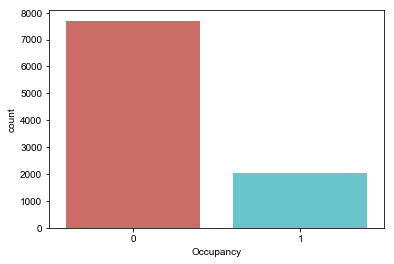

In [2]:
print(data['Occupancy'].value_counts())

sns.countplot(x='Occupancy',data = data, palette='hls',order = data['Occupancy'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [3]:
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

## Correlation

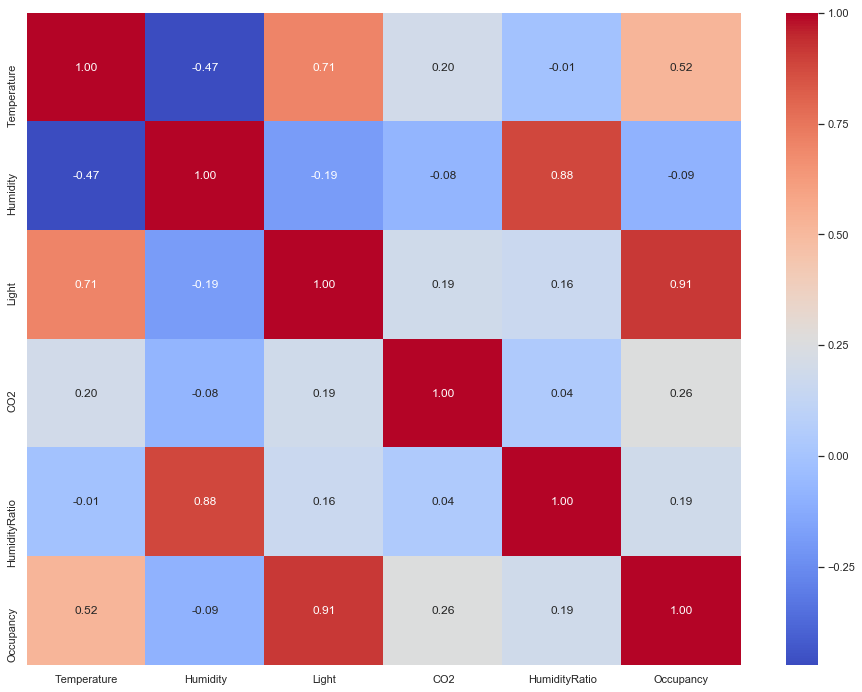

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["Occupancy"].sort_values(ascending=False)

Occupancy        1.000000
Light            0.914525
Temperature      0.521767
CO2              0.261908
HumidityRatio    0.190161
Humidity        -0.087768
Name: Occupancy, dtype: float64

## Data Processing and Selection

In [6]:
X = data.iloc[:, 1:6].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (9752, 5)


array([[2.17600000e+01, 3.11333333e+01, 4.37333333e+02, 1.02966667e+03,
        5.02101100e-03],
       [2.17900000e+01, 3.10000000e+01, 4.37333333e+02, 1.00000000e+03,
        5.00858100e-03]])

In [7]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (9752,)


array([1, 1, 1, 1, 1], dtype=int64)

## Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (9752, 5)


array([[0.7428975 , 0.31407433, 1.50936314, 0.93052718, 0.81406336],
       [0.7722908 , 0.28034161, 1.50936314, 0.83066661, 0.79065282]])

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (6826, 5) (6826,)
X TEST Set :  (2926, 5) (2926,)


## Gradient Boosting Classifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

R-Square               : 0.9472
Mean Absolute Error    : 0.0089
Mean Squared Error     : 0.0089
Root Mean Squared Error: 0.0943
Accuracy               : 0.9911
Precision              : 0.9688
Recall                 : 0.9904


## Data Prediction

In [11]:
df_pred1 = data[data.index == 2]
df_pred2 = data[data.index == 250]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2,11/02/2015 14:50,21.7675,31.1225,434.0,1003.75,0.005022,1
250,11/02/2015 18:58,21.2900,29.8000,0.0,616.00,0.004667,0


In [12]:
Xhat = df_pred.iloc[:, 1:6].values
Xhat = scaler.transform(Xhat)

yhat = data.iloc[:, -1].values

In [13]:
GB_pred = gb.predict(Xhat)
GB_pred

array([1, 0], dtype=int64)